In [1]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from utils import load, plot_history, compose_alpha
from models import own_custom_conv_net, neuralmon_conv_net, smaller_VGGNet

In [2]:
def custom_CNN_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)),   
        
        layers.Conv2D(32, (3, 3), activation='relu'), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)), 
        
        layers.Conv2D(64, (3, 3), activation='relu'), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)), 

        layers.Conv2D(128, (3, 3), activation='relu'), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)), 
        
        layers.Conv2D(150, (3, 3), activation='relu'), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)), 
        
        layers.Flatten(), 
        layers.Dense(64, activation='relu'), 
        layers.Dense(18, activation='sigmoid'), 
    ])
    
    return model

In [3]:
train_dataset, val_dataset = load(csv="pokemon_image_dataset.csv", image_path="./images/pokemon_image_dataset")
train_dataset2, val_dataset2 = load(csv="synthetic_pokemon.csv", image_path="./images/synthetic_pokemon")
train_dataset3, val_dataset3 = load(csv="synthetic_pokemon_v2.csv", image_path="./images/synthetic_pokemon_v2")

In [4]:
histories = []

In [5]:
def compute_class_weights(dataset):
    # Initialize counters
    positive_counts = tf.zeros(18, dtype=tf.int32)
    total_samples = 0

    # Iterate over the dataset
    for _, labels in dataset:
        positive_counts += tf.reduce_sum(labels, axis=0)
        total_samples += tf.shape(labels)[0]

    # Convert to numpy for easier manipulation
    positive_counts = positive_counts.numpy()
    total_samples = total_samples.numpy()

    # Calculate class weights
    class_weights = {}
    for i in range(18):
        if positive_counts[i] > 0:
            class_weights[i] = (1 / positive_counts[i]) * (total_samples / 2.0)
        else:
            class_weights[i] = 1.0  # Assign a neutral weight if the class doesn't appear

    return class_weights

class_weights = compute_class_weights(train_dataset)
print(class_weights)

{0: 3.4052631578947365, 1: 3.554945054945055, 2: 4.147435897435897, 3: 4.256578947368421, 4: 4.556338028169014, 5: 5.303278688524591, 6: 5.7767857142857135, 7: 6.739583333333333, 8: 5.7767857142857135, 9: 6.882978723404255, 10: 7.890243902439025, 11: 7.3522727272727275, 12: 8.294871794871794, 13: 8.513157894736842, 14: 9.51470588235294, 15: 9.242857142857142, 16: 10.109375, 17: 10.783333333333333}


In [6]:
model_BCLoss = custom_CNN_model((120,120,3))

model_BCLoss.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy', 'AUC', 'Precision', 'Recall'])

history1 = model_BCLoss.fit(
    train_dataset,
    epochs = 50,
    validation_data = val_dataset,
    verbose = 1
)
histories.append(history1)

Epoch 1/50


c:\Uni\Enhancing-Pokemon-Type-Recognition-with-Hybrid-Datasets\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - AUC: 0.5376 - Precision: 0.0969 - Recall: 0.2758 - accuracy: 0.0680 - loss: 0.5703 - val_AUC: 0.4572 - val_Precision: 0.0743 - val_Recall: 0.2680 - val_accuracy: 0.0185 - val_loss: 0.6793
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - AUC: 0.6449 - Precision: 0.3339 - Recall: 0.0176 - accuracy: 0.1619 - loss: 0.2894 - val_AUC: 0.4746 - val_Precision: 0.0823 - val_Recall: 0.3891 - val_accuracy: 0.0432 - val_loss: 0.6219
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - AUC: 0.7597 - Precision: 0.4544 - Recall: 0.0245 - accuracy: 0.3160 - loss: 0.2509 - val_AUC: 0.4710 - val_Precision: 0.0815 - val_Recall: 0.4375 - val_accuracy: 0.0185 - val_loss: 0.6159
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - AUC: 0.8307 - Precision: 0.7419 - Recall: 0.0593 - accuracy: 0.3532 - loss: 0.2299 - val_AUC: 0.5008 - val_Precision: 0.0896 - val_Recall: 0.4120 - val_accuracy: 0.0062 - val_loss: 0.5997
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 11

In [7]:
model_BCLoss_weighted = custom_CNN_model((120,120,3))

model_BCLoss_weighted.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy', 'AUC', 'Precision', 'Recall'])

history2 = model_BCLoss_weighted.fit(
    train_dataset,
    epochs = 50,
    validation_data = val_dataset,
    verbose = 1,
    class_weight=class_weights
)
histories.append(history2)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - AUC: 0.5356 - Precision: 0.0924 - Recall: 0.1870 - accuracy: 0.1002 - loss: 2.6800 - val_AUC: 0.4719 - val_Precision: 0.0829 - val_Recall: 0.7224 - val_accuracy: 0.0185 - val_loss: 0.7416
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - AUC: 0.6982 - Precision: 0.3832 - Recall: 0.0170 - accuracy: 0.1677 - loss: 1.4159 - val_AUC: 0.4891 - val_Precision: 0.0908 - val_Recall: 0.7137 - val_accuracy: 0.0432 - val_loss: 0.8148
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - AUC: 0.7674 - Precision: 0.8490 - Recall: 0.0375 - accuracy: 0.2950 - loss: 1.2847 - val_AUC: 0.5085 - val_Precision: 0.0877 - val_Recall: 0.5951 - val_accuracy: 0.0370 - val_loss: 0.8436
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - AUC: 0.8668 - Precision: 0.9422 - Recall: 0.1019 - accuracy: 0.4602 - loss: 1.0787 - val_AUC: 0.4887 - val_Precision: 0.0776 - val_Recall: 0.5489 - val_accuracy: 0.0123 - val_loss: 0.8139
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━

In [8]:
model_BCFLoss = custom_CNN_model((120,120,3))

model_BCFLoss.compile(optimizer='adam',
            loss='binary_focal_crossentropy',
            metrics=['accuracy', 'AUC', 'Precision', 'Recall'])

history3 = model_BCFLoss.fit(
    train_dataset,
    epochs = 50,
    validation_data = val_dataset,
    verbose = 1
)
histories.append(history3)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - AUC: 0.5583 - Precision: 0.1048 - Recall: 0.2383 - accuracy: 0.1184 - loss: 0.2234 - val_AUC: 0.5394 - val_Precision: 0.0988 - val_Recall: 0.4534 - val_accuracy: 0.0247 - val_loss: 0.1935
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - AUC: 0.7116 - Precision: 0.3970 - Recall: 0.0600 - accuracy: 0.2460 - loss: 0.0729 - val_AUC: 0.5329 - val_Precision: 0.0913 - val_Recall: 0.4815 - val_accuracy: 0.0123 - val_loss: 0.2816
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - AUC: 0.8177 - Precision: 0.6394 - Recall: 0.1092 - accuracy: 0.3639 - loss: 0.0625 - val_AUC: 0.5170 - val_Precision: 0.0813 - val_Recall: 0.5062 - val_accuracy: 0.0370 - val_loss: 0.3668
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - AUC: 0.8611 - Precision: 0.7468 - Recall: 0.1677 - accuracy: 0.4389 - loss: 0.0569 - val_AUC: 0.4980 - val_Precision: 0.0755 - val_Recall: 0.4603 - val_accuracy: 0.0247 - val_loss: 0.4492
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━

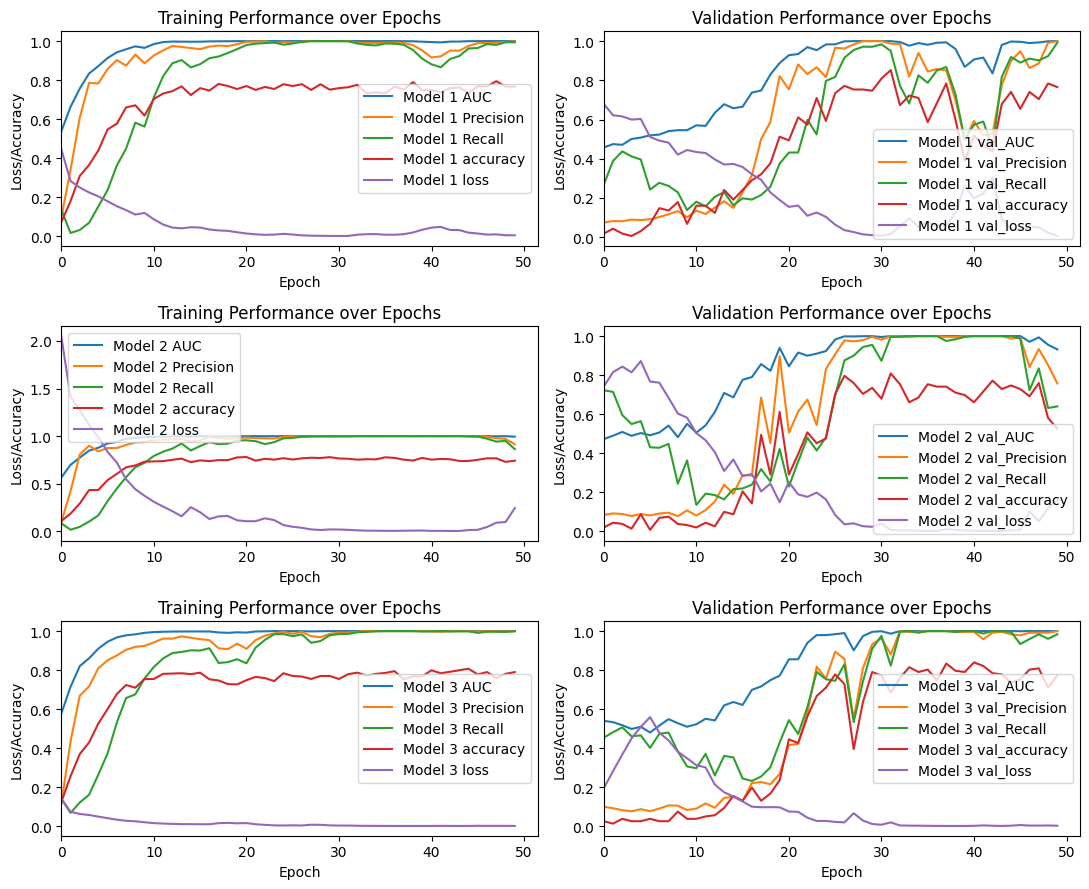

In [9]:
def plot_history(histories):
    # Create a figure with two subplots: one for loss, one for accuracy
    fig, axs = plt.subplots(len(histories), 2, figsize=(11, len(histories)*3))
    if len(histories) == 1:
        axs = [axs]
    for i, (history, (ax1, ax2)) in enumerate(zip(histories,axs)):
        # Iterate over each history and label to plot on the same figure
        # Plot all metrics included in the history object
        for key in history.history.keys():
            # check if the key includes "val" or not
            if 'val' in key:
                ax2.plot(history.history[key], label='Model '+str(i+1)+' '+key)
            else:
                ax1.plot(history.history[key], label='Model '+str(i+1)+' '+key)

        # Customize loss subplot
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss/Accuracy')
        ax1.set_title('Training Performance over Epochs')
        ax1.legend()
        ax1.set_xlim(left=0)  # Ensure the x-axis starts at 0

        # Customize accuracy subplot
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Loss/Accuracy')
        ax2.set_title('Validation Performance over Epochs')
        ax2.legend()
        ax2.set_xlim(left=0)  # Ensure the x-axis starts at 0
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()
    
plot_history(histories)

In [10]:
for i, history in enumerate(histories):
    print("Max   training accuracy Model "+str(i+1)+" in Epoch", np.argmax(history.history['accuracy']), "with value", np.max(history.history['accuracy']))
    print("Max validation accuracy Model "+str(i+1)+" in Epoch", np.argmax(history.history['val_accuracy']), "with value", np.max(history.history['val_accuracy']))
    print()

Max   training accuracy Model 1 in Epoch 47 with value 0.7944358587265015
Max validation accuracy Model 1 in Epoch 31 with value 0.8518518805503845

Max   training accuracy Model 2 in Epoch 20 with value 0.7805255055427551
Max validation accuracy Model 2 in Epoch 31 with value 0.8086419701576233

Max   training accuracy Model 3 in Epoch 44 with value 0.8068006038665771
Max validation accuracy Model 3 in Epoch 40 with value 0.8395061492919922



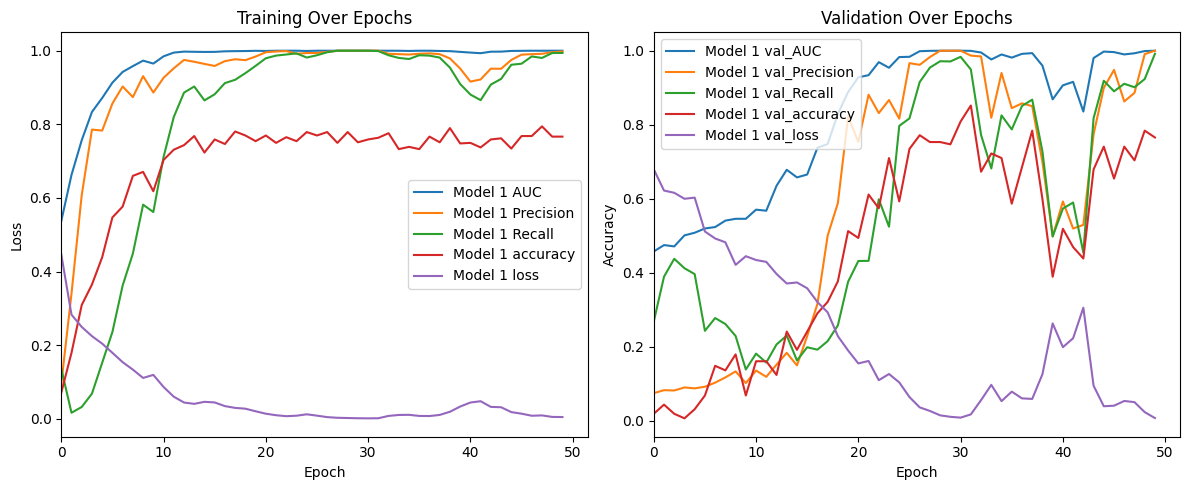

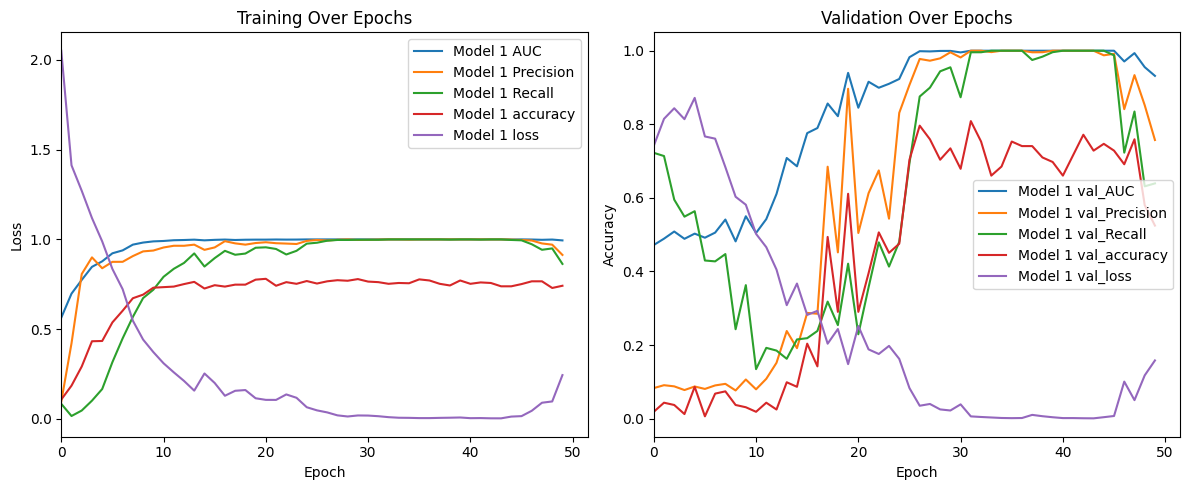

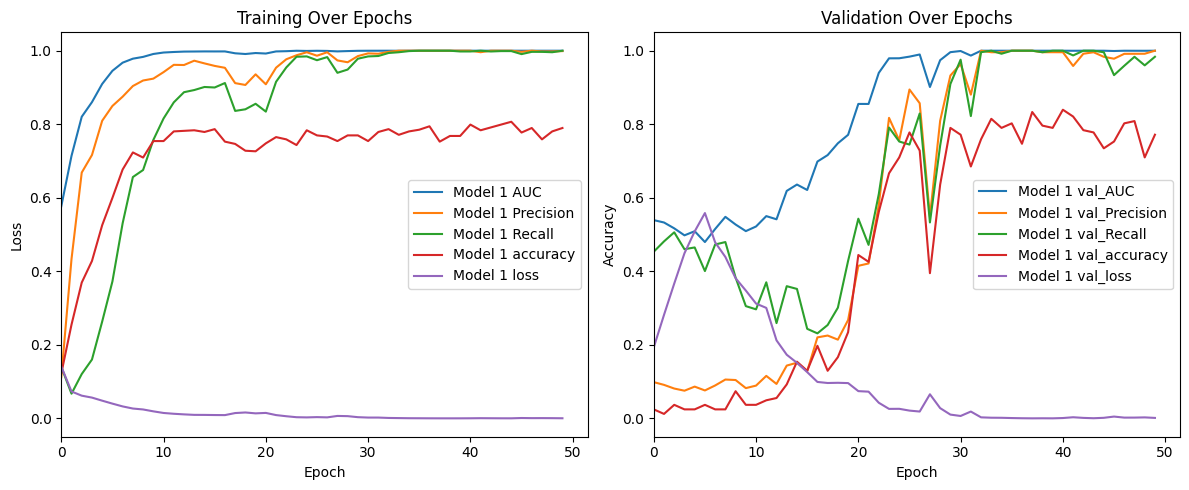

In [11]:
def plot_seperate_history(histories):
    # Create a figure with two subplots: one for loss, one for accuracy
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Iterate over each history and label to plot on the same figure
    for i, history in enumerate(histories):
        
        # Plot all metrics included in the history object
        for key in history.history.keys():
            # check if the key includes "val" or not
            if 'val' in key:
                ax2.plot(history.history[key], label='Model '+str(i+1)+' '+key)
            else:
                ax1.plot(history.history[key], label='Model '+str(i+1)+' '+key)

    # Customize loss subplot
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training Over Epochs')
    ax1.legend()
    ax1.set_xlim(left=0)  # Ensure the x-axis starts at 0

    # Customize accuracy subplot
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Validation Over Epochs')
    ax2.legend()
    ax2.set_xlim(left=0)  # Ensure the x-axis starts at 0

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()
    
for history in histories:
    plot_seperate_history([history])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
tf.Tensor([0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(18,), dtype=int32)
[0.002 0.    0.002 0.999 0.001 0.    0.    0.    0.    0.    0.014 0.003
 0.011 0.092 0.012 0.002 0.001 0.   ]
(120, 120, 3)
Accuracy:  [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1

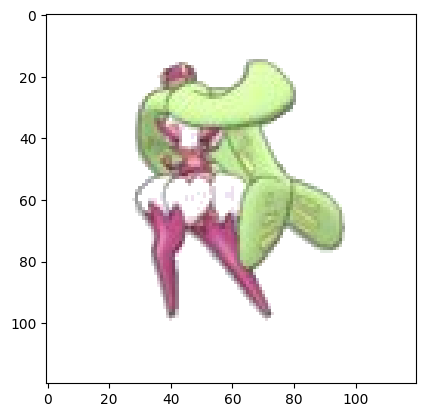

In [12]:
for sample in val_dataset:
    pred = model_BCLoss.predict(sample[0])
    pred = model_BCLoss(sample[0], training=False)
    print(sample[1][0])
    print(np.around(pred[0], decimals=3))
    img = sample[0][0].numpy()
    print(img.shape)
    # print tensorflow accuracy of the prediction
    print("Accuracy: ", tf.keras.metrics.binary_accuracy(sample[1], pred).numpy())

    plt.imshow(img, interpolation='nearest')
    plt.show()
    break